# Mitsiu Alejandro Carreño Sarabia - E23S-18014
Realiza un cuaderno donde:
Obtengas una base una base de tu interés que tenga muchas variables (mas de 10), recuerda que tienen que ser numéricas.
Realiza el análisis de componentes principales y elige las componentes que mas capten la variabilidad. 
Grafica tus resultados 

La información para este ejercicio se descargó de 
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
El dataset reúne distintas caracteristicas relacionadas con la salud de personas y emite un resultado si tiene o no diabetes.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

df = pd.read_csv("s9_pca_diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


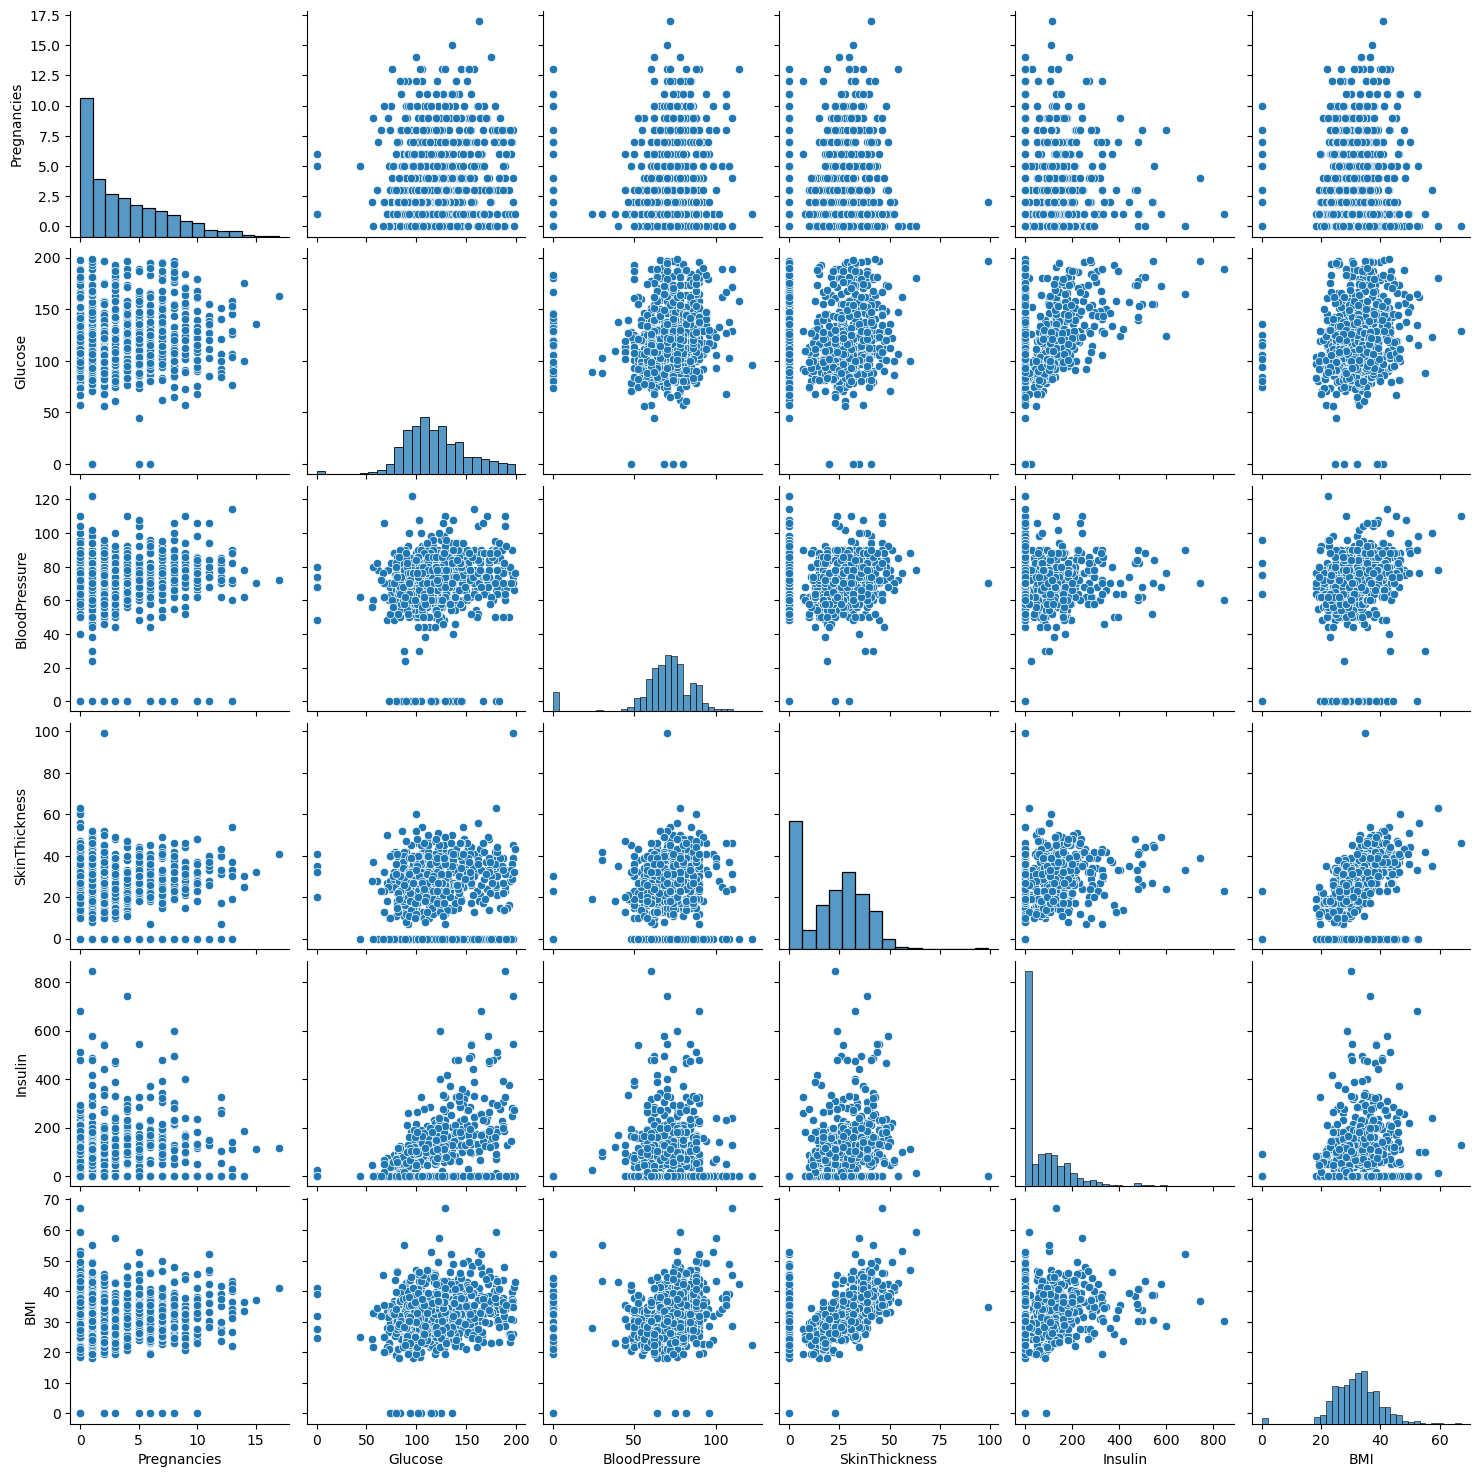

In [2]:
# Gráficando distintas columnas y como se relacionan entre ellas
sns.pairplot(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]])

In [3]:
#Creamos el modelo de análisis de componentes principales
pca = PCA()
x_pca = pca.fit_transform(df)

In [4]:
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente principal:
[8.88533592e-01 6.15928850e-02 2.57897340e-02 1.30860309e-02
 7.44110616e-03 3.02662803e-03 5.12624608e-04 1.08526940e-05
 6.54609532e-06]


In [5]:
# Podemos observar que con dos variables tenemos el 95% de cobertura y con 5 el 99%
np.cumsum(pca.explained_variance_ratio_)

array([0.88853359, 0.95012648, 0.97591621, 0.98900224, 0.99644335,
       0.99946998, 0.9999826 , 0.99999345, 1.        ])

In [6]:
# Creamos un segundo modelo, y vamos a tomar solo 5 componentes para llegar al 99% de cobertura
pca_2 = PCA(n_components=5)
x_pca_2 = pca_2.fit_transform(df)
print(pca_2.explained_variance_ratio_)

[0.88853359 0.06159289 0.02578973 0.01308603 0.00744111]


In [7]:
pca_2_df = pd.DataFrame(data =x_pca_2)
pca_2_df

,0,1,2,3,4
0,-75.714249,-35.954944,-7.260683,15.670527,16.507978
1,-82.358466,28.909559,-5.496649,9.004430,3.480381
2,-74.630229,-67.909633,19.461753,-5.653114,-10.299176
3,11.077206,34.900175,-0.053004,1.314561,-7.619943
4,89.744156,-2.751263,25.213059,18.995906,8.525785
...,...,...,...,...,...
763,99.237653,25.083009,-19.534828,4.438584,35.614727
764,-78.641427,-7.685767,-4.137339,13.739069,-4.534789
765,32.112987,3.379222,-1.587972,-0.879451,-2.981615
766,-80.214095,-14.190595,12.351422,-14.292528,8.536991


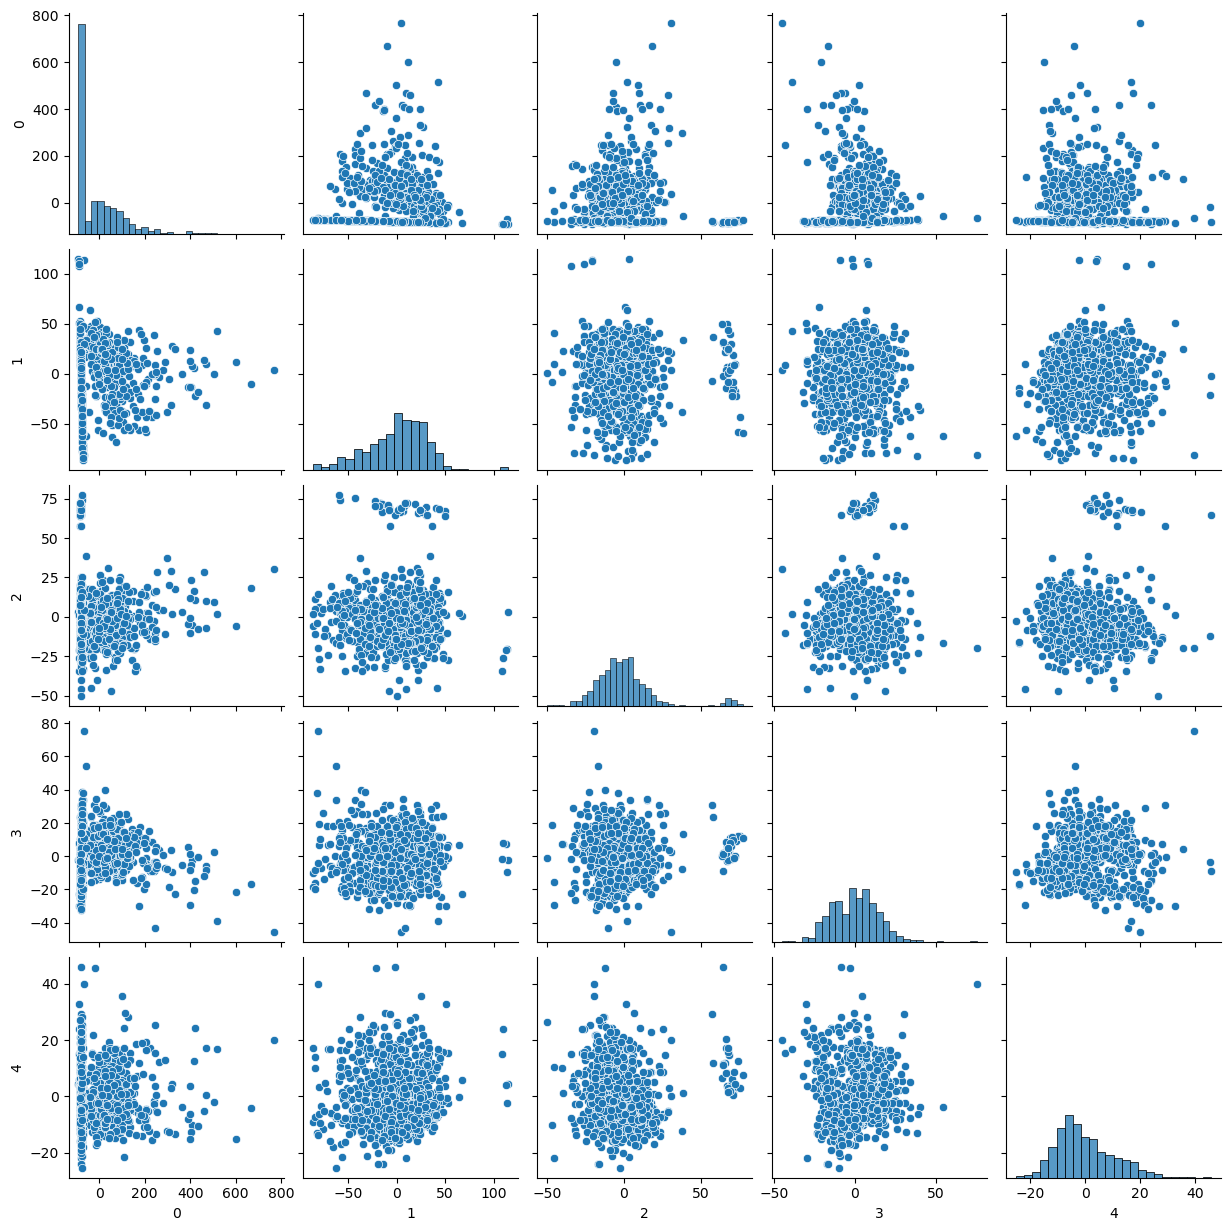

In [8]:
# Volvemos a comparar, pero ahora con los 5 componentes principales
sns.pairplot(pca_2_df)